In [1]:
import pandas as pd
import numpy as np

#import acquire
#import prepare

import seaborn as sns
import matplotlib.pyplot as plt 


import wrangle as w

from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt 

import warnings
warnings.filterwarnings("ignore")

## Initial Questions

1. Will more bedrooms and bathrooms drive house value up?


2. Does lot size sqft increase home value?


3. Does the month of the transaction of the home affect the price of the home?


4. Are Orange County home values higher vs. Los Angeles and Ventura home values?



In [4]:
sample = w.get_zillow_data()
sample.head()

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value
0,1940.0,6750.0,0.279112,-118388723.0,34182197.0,1,1.0,3.0,6037.0,1114.0,330387.0
1,1936.0,8098.0,0.158130,-118398122.0,34180389.0,1,3.0,3.0,6037.0,2479.0,174155.0
2,1956.0,6049.0,-0.019678,-118402898.0,34181471.0,1,2.0,3.0,6037.0,1566.0,534455.0
3,1949.0,9411.0,0.005471,-118410984.0,34182042.0,1,1.0,2.0,6037.0,1287.0,330938.0
4,1948.0,7181.0,0.089711,-118407191.0,34181941.0,1,1.0,3.0,6037.0,1706.0,440099.0


In [5]:
df = w.get_zillow_data()
df.head()

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value
0,1940.0,6750.0,0.279112,-118388723.0,34182197.0,1,1.0,3.0,6037.0,1114.0,330387.0
1,1936.0,8098.0,0.158130,-118398122.0,34180389.0,1,3.0,3.0,6037.0,2479.0,174155.0
2,1956.0,6049.0,-0.019678,-118402898.0,34181471.0,1,2.0,3.0,6037.0,1566.0,534455.0
3,1949.0,9411.0,0.005471,-118410984.0,34182042.0,1,1.0,2.0,6037.0,1287.0,330938.0
4,1948.0,7181.0,0.089711,-118407191.0,34181941.0,1,1.0,3.0,6037.0,1706.0,440099.0


In [6]:
df.shape

(51612, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51612 entries, 0 to 51611
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_built         51612 non-null  float64
 1   lot_sqft           51612 non-null  float64
 2   logerror           51612 non-null  float64
 3   long               51612 non-null  float64
 4   lat                51612 non-null  float64
 5   transaction_month  51612 non-null  int64  
 6   bathrooms          51612 non-null  float64
 7   bedrooms           51612 non-null  float64
 8   fips               51612 non-null  float64
 9   sqft               51612 non-null  float64
 10  home_value         51612 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.3 MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_built,51612.0,1.960287e+03,21.481517,1.862000e+03,1.949000e+03,1.958000e+03,1.973000e+03,2.016000e+03
lot_sqft,51612.0,7.229715e+03,2908.099896,5.000000e+02,5.594000e+03,6.656000e+03,8.060000e+03,1.999900e+04
logerror,51612.0,1.687623e-02,0.173454,-4.655420e+00,-2.445563e-02,6.788081e-03,3.943327e-02,5.262999e+00
long,51612.0,-1.182002e+08,348104.514160,-1.194484e+08,-1.183924e+08,-1.181525e+08,-1.179511e+08,-1.175559e+08
lat,51612.0,3.400763e+07,243978.009776,3.334071e+07,3.383288e+07,3.400462e+07,3.417632e+07,3.471836e+07
transaction_month,51612.0,5.039894e+00,2.344391,1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00
bathrooms,51612.0,2.157802e+00,0.841766,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
bedrooms,51612.0,3.264590e+00,0.868132,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
fips,51612.0,6.048721e+03,20.900511,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
sqft,51612.0,1.756618e+03,723.143793,3.200000e+02,1.245000e+03,1.589000e+03,2.109000e+03,8.243000e+03


## Prepare

In [6]:
df = df.rename(columns={'bedroomcnt':'bedrooms', 
                   'bathroomcnt':'bathrooms',
                   'calculatedfinishedsquarefeet':'sqft',
                   'yearbuilt':'year_built',
                   'longitude':'long',
                   'latitude': 'lat',
                   'transactiondate': 'transaction_month',
                   'lotsizesquarefeet': 'lot_sqft',
                   'taxvaluedollarcnt':'home_value'})

In [7]:
df

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value
0,1940.0,6750.0,0.279112,-118388723.0,34182197.0,1,1.0,3.0,6037.0,1114.0,330387.0
1,1936.0,8098.0,0.158130,-118398122.0,34180389.0,1,3.0,3.0,6037.0,2479.0,174155.0
2,1956.0,6049.0,-0.019678,-118402898.0,34181471.0,1,2.0,3.0,6037.0,1566.0,534455.0
3,1949.0,9411.0,0.005471,-118410984.0,34182042.0,1,1.0,2.0,6037.0,1287.0,330938.0
4,1948.0,7181.0,0.089711,-118407191.0,34181941.0,1,1.0,3.0,6037.0,1706.0,440099.0
...,...,...,...,...,...,...,...,...,...,...,...
51607,1954.0,7505.0,0.003785,-118399073.0,34233216.0,9,1.0,3.0,6037.0,999.0,222136.0
51608,1958.0,8339.0,0.062060,-118400541.0,34234902.0,9,2.0,3.0,6037.0,1366.0,211616.0
51609,1973.0,7499.0,0.029647,-118421360.0,34227043.0,9,3.0,4.0,6037.0,2180.0,538107.0
51610,1954.0,6068.0,0.040940,-118419411.0,34229157.0,9,2.0,3.0,6037.0,1570.0,368839.0


In [ ]:
df['transaction_month'] = df['transaction_month'].str.replace("-", "").astype(float)

In [ ]:
df['transaction_month']= df['transaction_month'].astype(str).str[4:6].astype(int)

In [ ]:
df.info()

In [ ]:
df['transaction_month']

In [ ]:
df.transaction_month.value_counts()

In [ ]:
df['fips'].value_counts()

In [ ]:
df.isna().sum()

In [ ]:
df = df.dropna()

In [9]:
df.isna().sum()

year_built           0
lot_sqft             0
logerror             0
long                 0
lat                  0
transaction_month    0
bathrooms            0
bedrooms             0
fips                 0
sqft                 0
home_value           0
dtype: int64

In [10]:
df.bedrooms.value_counts()

3.0    23829
4.0    15200
2.0     8384
5.0     3277
1.0      496
6.0      426
Name: bedrooms, dtype: int64

In [11]:
df.bathrooms.value_counts()

2.0    23690
1.0    10313
3.0    10126
2.5     3562
4.0     1605
1.5      766
3.5      588
5.0      428
4.5      356
6.0       89
5.5       89
Name: bathrooms, dtype: int64

In [12]:
len(df[df.sqft > 10_000])

0

In [13]:
df = w.clean_zillow_data(df)

In [14]:
df.bedrooms.value_counts()

3.0    23829
4.0    15200
2.0     8384
5.0     3277
1.0      496
6.0      426
Name: bedrooms, dtype: int64

In [ ]:
county_map = {6037: 'los angeles', 6111: 'ventura', 6059: 'orange'}
df['county'] = df['fips'].replace(county_map)

In [15]:
# create a dictionary to map fips codes to county names
county_map = {6037: 'los angeles', 6111: 'ventura', 6059: 'orange'}

# use replace function to create the 'county' column
df['county'] = df['fips'].replace(county_map)

df.head()

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value,county
0,1940.0,6750.0,0.279112,-118388723.0,34182197.0,1,1.0,3.0,6037.0,1114.0,330387.0,los angeles
1,1936.0,8098.0,0.158130,-118398122.0,34180389.0,1,3.0,3.0,6037.0,2479.0,174155.0,los angeles
2,1956.0,6049.0,-0.019678,-118402898.0,34181471.0,1,2.0,3.0,6037.0,1566.0,534455.0,los angeles
3,1949.0,9411.0,0.005471,-118410984.0,34182042.0,1,1.0,2.0,6037.0,1287.0,330938.0,los angeles
4,1948.0,7181.0,0.089711,-118407191.0,34181941.0,1,1.0,3.0,6037.0,1706.0,440099.0,los angeles


### Split data

In [16]:
train, validate, test = w.train_val_test(df)

train.shape, validate.shape, test.shape

((36128, 12), (18064, 12), (18064, 12))

## Data Exploration


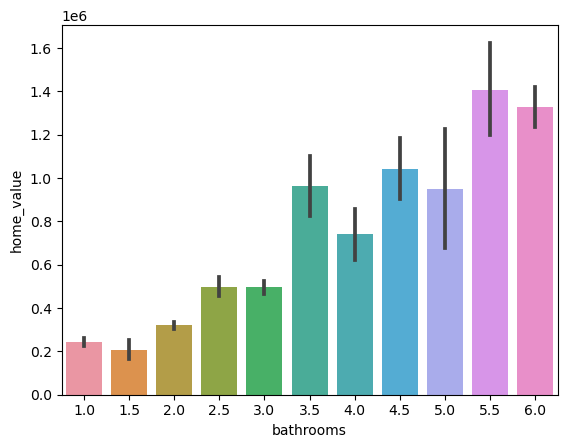

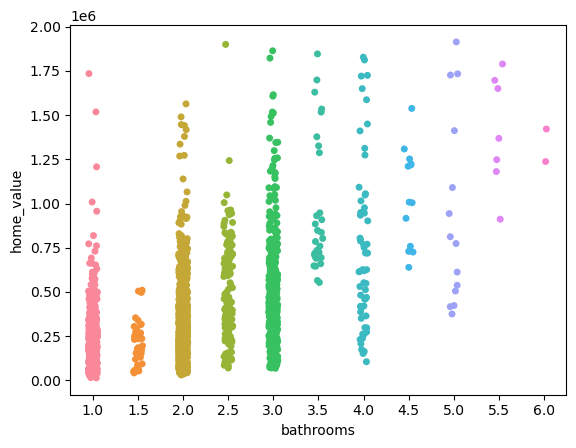

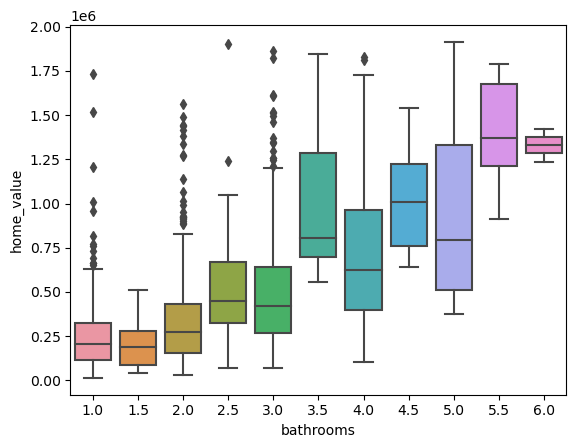

<Figure size 640x480 with 0 Axes>

In [17]:
w.plot_categorical_and_continuous_vars(train, 'bathrooms', 'home_value')

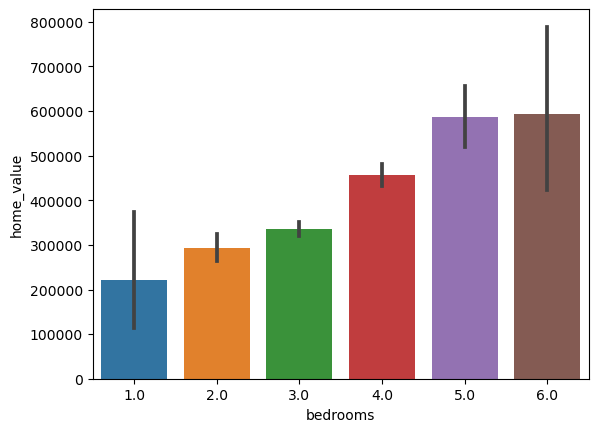

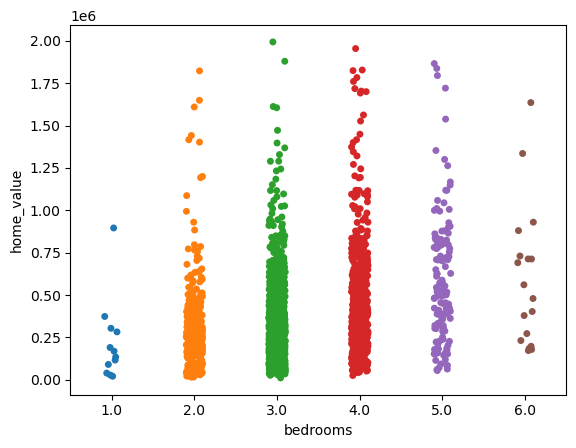

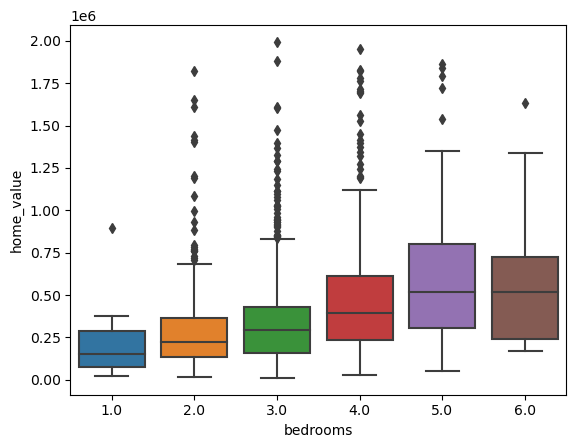

<Figure size 640x480 with 0 Axes>

In [18]:
w.plot_categorical_and_continuous_vars(train, 'bedrooms', 'home_value')

In [19]:
train

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value,county
6939,1977.0,6000.0,-0.022559,-118030874.0,33775466.0,2,3.0,4.0,6059.0,2334.0,687000.0,orange
6471,1952.0,7220.0,-0.023329,-118125470.0,33964006.0,2,2.0,3.0,6037.0,1330.0,74121.0,los angeles
44553,1954.0,6951.0,-0.127179,-118385820.0,33807786.0,8,2.0,3.0,6037.0,2571.0,143122.0,los angeles
31088,1996.0,5735.0,0.006475,-118833422.0,34221985.0,6,2.5,4.0,6111.0,2394.0,470066.0,ventura
4038,1904.0,6793.0,-0.006862,-118281348.0,34097180.0,1,2.0,4.0,6037.0,2051.0,107819.0,los angeles
...,...,...,...,...,...,...,...,...,...,...,...,...
23030,1925.0,8375.0,0.009571,-118151500.0,34194602.0,5,2.0,4.0,6037.0,2190.0,463419.0,los angeles
24932,1956.0,6427.0,-0.066290,-117996013.0,33928503.0,5,2.0,3.0,6037.0,1314.0,178423.0,los angeles
31680,1987.0,6055.0,0.016211,-118075443.0,34065150.0,6,3.0,5.0,6037.0,1884.0,303959.0,los angeles
29484,1997.0,6143.0,-0.020053,-117790568.0,33801461.0,5,3.0,5.0,6059.0,3259.0,488280.0,orange


In [41]:
train.columns.tolist()

['year_built',
 'lot_sqft',
 'logerror',
 'long',
 'lat',
 'transaction_month',
 'bathrooms',
 'bedrooms',
 'fips',
 'sqft',
 'home_value',
 'county']

In [49]:
def hist_sqft(x):
    sns.histplot(df[x].sample(2000))
    plt.show()

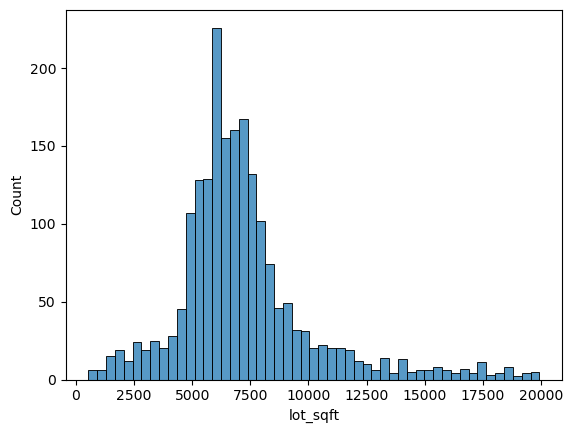

In [50]:
hist_sqft('lot_sqft')

In [21]:
train['lot_sqft'].value_counts().sort_index()

500.0      1
540.0      3
584.0      1
594.0      1
640.0      1
          ..
19963.0    1
19979.0    1
19986.0    1
19987.0    1
19999.0    1
Name: lot_sqft, Length: 9827, dtype: int64

In [22]:
len(train[train['lot_sqft']> 30000])

0

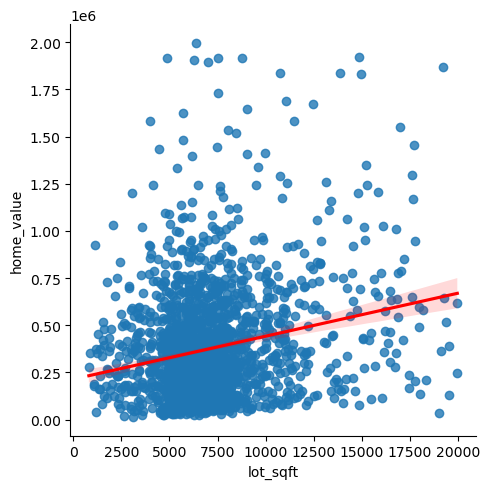

In [23]:
sns.lmplot(x = 'lot_sqft' , y = 'home_value', data = train.sample(2000), line_kws={'color': 'red'})
plt.show()

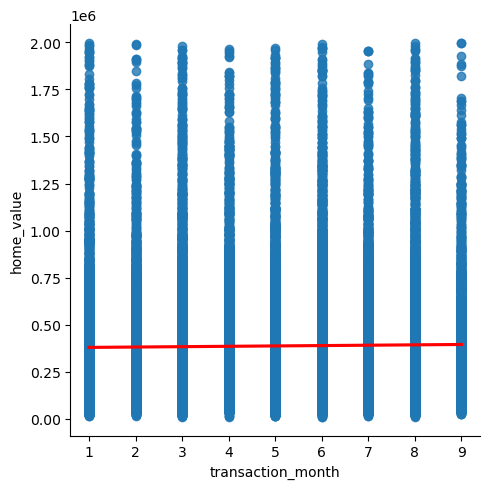

In [24]:
sns.lmplot(x = 'transaction_month' , y = 'home_value', data = train, line_kws={'color': 'red'})
plt.show()

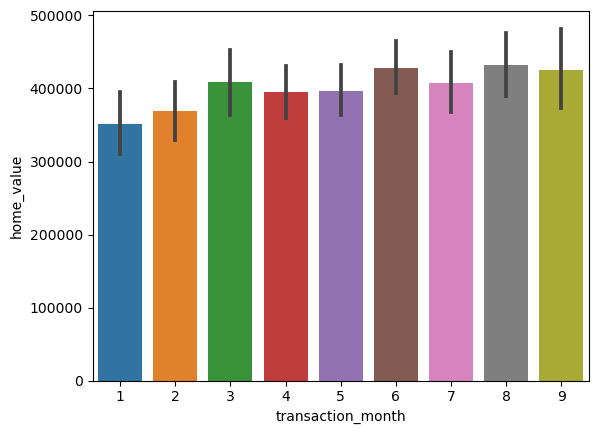

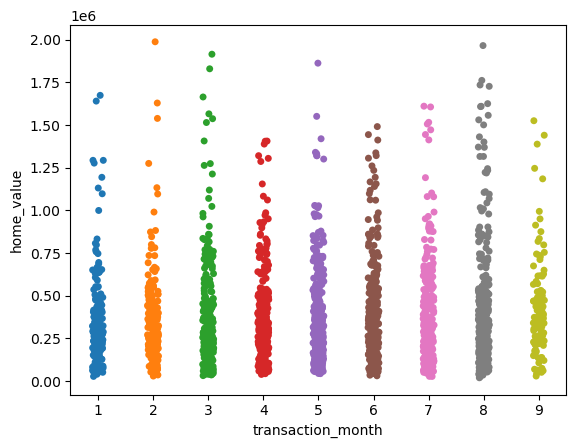

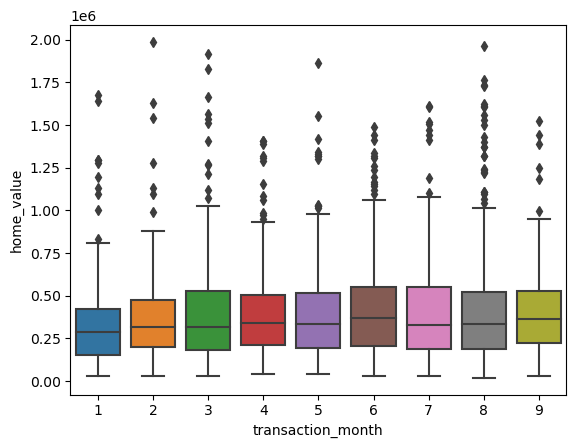

<Figure size 640x480 with 0 Axes>

In [25]:
w.plot_categorical_and_continuous_vars(train, 'transaction_month', 'home_value')

In [26]:
la_county = df['fips'] == 6037
ventura_county = df['fips'] == 6111
orange_county = df['fips'] == 6059

In [27]:
train['lot_sqft'][la_county].mean()

7375.815226976862

In [28]:
df[la_county]['home_value'].mean()

359342.935918463

In [29]:
df[ventura_county]['home_value'].mean()

383549.70469007775

In [30]:
df[orange_county]['home_value'].mean()

459852.27243856335

In [31]:
la_county

0        True
1        True
2        True
3        True
4        True
         ... 
51607    True
51608    True
51609    True
51610    True
51611    True
Name: fips, Length: 51612, dtype: bool

In [65]:
def outline(df):
    fig, ax = plt.subplots(figsize = (7,5))
    sns.scatterplot(data = df,x = df['long'], y = df['lat'], zorder = 1,hue = 'county', 
                    hue_order = ['ventura', 'orange', 'los angeles'])
    plt.show()

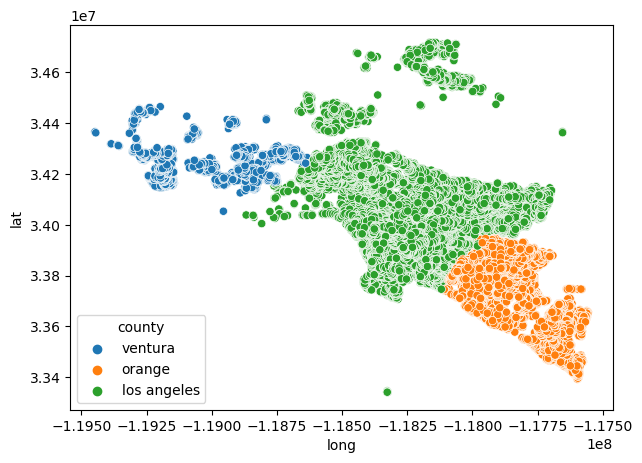

In [66]:
outline(df)

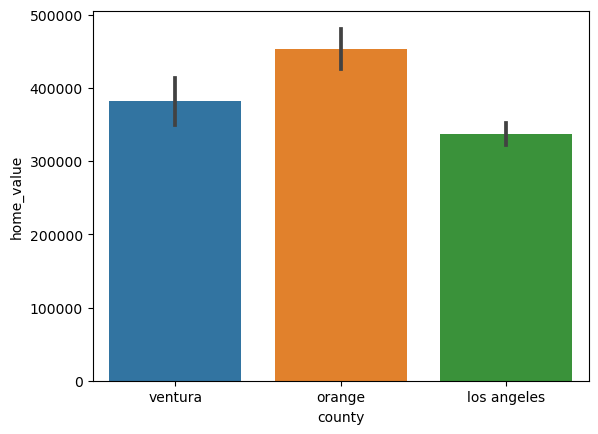

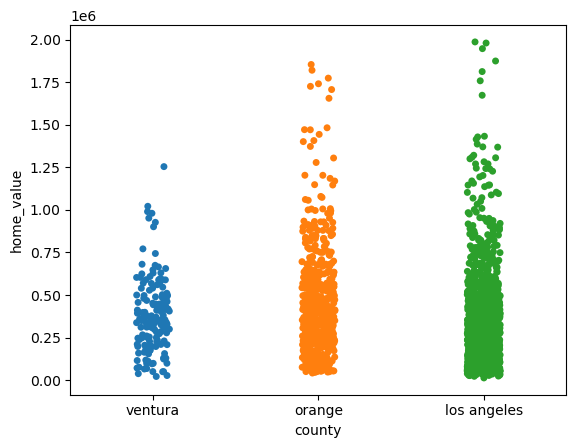

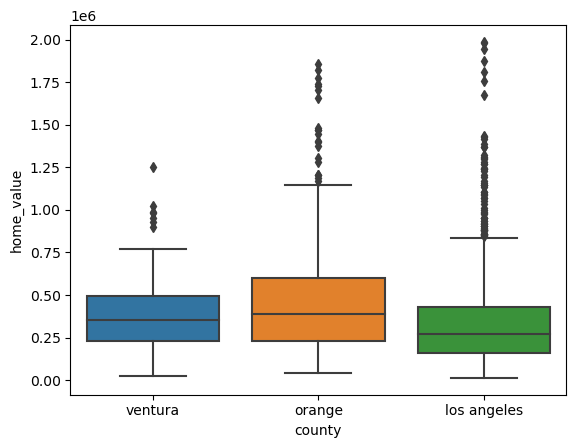

<Figure size 640x480 with 0 Axes>

In [34]:
w.plot_categorical_and_continuous_vars(train, 'county', 'home_value')

### Stats testing

$H_0$: The month of the transaction is independent of the home price (Independent)

$H_a$:  The home price is dependent on the month of the transaction (Dependent)

𝜶 = 0.05

In [35]:
train['transaction_month']

6939     2
6471     2
44553    8
31088    6
4038     1
        ..
23030    5
24932    5
31680    6
29484    5
43893    8
Name: transaction_month, Length: 36128, dtype: int64

In [36]:
α = 0.05

month = train['transaction_month']
home_value = train['home_value']

corr, p_value = pearsonr(month, home_value)

if p_value < α:
    print("Reject the Null Hypothesis. There is a relationship between transactions date and home value.")
else:
    print("Fail to reject the Null Hypothesis. There is no relationship between months and home value.")


Reject the Null Hypothesis. There is a dependency between transactions date and home value.


In [214]:
corr, p_value

(0.015107085116070033, 0.004084982696505427)

**Takeaways**

Home values do seem to matter when you sell. Our statistical test suggest there is a dependect between transaction dat and home value

$H_0$: Orange County home values are <= Los Angeles and Ventura home values

$H_a$: Orange County home values are > than Los Angeles and Ventura home values (greater than)

𝜶 = 0.05

In [37]:
train.head()

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value,county
6939,1977.0,6000.0,-0.022559,-118030874.0,33775466.0,2,3.0,4.0,6059.0,2334.0,687000.0,orange
6471,1952.0,7220.0,-0.023329,-118125470.0,33964006.0,2,2.0,3.0,6037.0,1330.0,74121.0,los angeles
44553,1954.0,6951.0,-0.127179,-118385820.0,33807786.0,8,2.0,3.0,6037.0,2571.0,143122.0,los angeles
31088,1996.0,5735.0,0.006475,-118833422.0,34221985.0,6,2.5,4.0,6111.0,2394.0,470066.0,ventura
4038,1904.0,6793.0,-0.006862,-118281348.0,34097180.0,1,2.0,4.0,6037.0,2051.0,107819.0,los angeles


In [67]:
train[train.county == 'los angeles']

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value,county
6471,1952.0,7220.0,-0.023329,-118125470.0,33964006.0,2,2.0,3.0,6037.0,1330.0,74121.0,los angeles
44553,1954.0,6951.0,-0.127179,-118385820.0,33807786.0,8,2.0,3.0,6037.0,2571.0,143122.0,los angeles
4038,1904.0,6793.0,-0.006862,-118281348.0,34097180.0,1,2.0,4.0,6037.0,2051.0,107819.0,los angeles
376,1954.0,6706.0,0.009916,-118609806.0,34167401.0,1,1.0,2.0,6037.0,1131.0,412169.0,los angeles
45371,1956.0,13555.0,0.047455,-118077529.0,33988727.0,8,2.0,4.0,6037.0,1336.0,314419.0,los angeles
...,...,...,...,...,...,...,...,...,...,...,...,...
20971,1957.0,11159.0,-0.014140,-118373360.0,33859319.0,5,2.0,4.0,6037.0,1689.0,87813.0,los angeles
23030,1925.0,8375.0,0.009571,-118151500.0,34194602.0,5,2.0,4.0,6037.0,2190.0,463419.0,los angeles
24932,1956.0,6427.0,-0.066290,-117996013.0,33928503.0,5,2.0,3.0,6037.0,1314.0,178423.0,los angeles
31680,1987.0,6055.0,0.016211,-118075443.0,34065150.0,6,3.0,5.0,6037.0,1884.0,303959.0,los angeles


In [70]:
def county_stats_test(train):
    ''' 
    This function takes in the train dataset and outputs the T-Test results for hypothesis 3
    in the zillow regression project addressing home value of homes in Orange County against
    homes in LA or Ventura.
    '''
    # Create the samples
    orange_homes = train[train.county == 'orange_county']['home_value']
    la_ventura_homes = train[(train.county == 'la_county')|(train.county == 'ventura_county')]['home_value']

    # Set alpha
    α = 0.05

    # Check for equal variances
    s, pval = stats.levene(orange_homes, la_ventura_homes)

    # Run the two-sample, one-tail T-test.
    # Use the results from checking for equal variances to set equal_var
    t, p = stats.ttest_ind(orange_homes, la_ventura_homes, equal_var=(pval > α))

    # Evaluate results based on the t-statistic and the p-value
    if p/2 < α and t < 0:
        print('''Reject the Null Hypothesis. 
            Findings suggest there is less value or equal value in Orange County homes than homes in LA or Ventura.''')
    else:
        print('''Fail to reject the Null Hypothesis. Findings suggest there is greater home values in Orange County homes than homes in LA or Ventura''')
        

In [71]:
county_stats_test(train)

Fail to reject the Null Hypothesis. Findings suggest there is greater home values in Orange County homes than homes in LA or Ventura


**Takeaways**

Orange County has higher home values than the other 2 counties.

## Feature Engineering

In [74]:
train_scaled, validate_scaled, test_scaled = w.mvp_scaled_data(train, validate, test)

train_scaled.shape, validate_scaled.shape, test_scaled.shape

((36128, 12), (18064, 12), (18064, 12))

In [75]:
train_scaled.head(3)

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value,county
6939,1977.0,0.282066,0.467097,0.749035,0.315577,2,3.0,4.0,6059.0,0.251362,687000.0,orange
6471,1952.0,0.344633,0.467019,0.699049,0.452433,2,2.0,3.0,6037.0,0.124161,74121.0,los angeles
44553,1954.0,0.330837,0.456549,0.561477,0.339037,8,2.0,3.0,6037.0,0.281389,143122.0,los angeles


In [76]:
X_train_scaled = train_scaled[['lot_sqft','logerror','long', 'lat', 'sqft']]
y_train = train_scaled['home_value']

In [77]:
def select_kbest(x,y,k):
    
    f_selector = SelectKBest(f_regression, k = k)
    
    f_selector.fit(x, y)   
    
    f_select_mask = f_selector.get_support()

    f_selector.transform(x)
    
    
    return x.iloc[:,f_select_mask]

In [78]:
select_kbest(X_train_scaled, y_train, 2)

,lot_sqft,sqft
6939,0.282066,0.251362
6471,0.344633,0.124161
44553,0.330837,0.281389
31088,0.268475,0.258964
4038,0.322734,0.215507
...,...,...
23030,0.403867,0.233118
24932,0.303964,0.122134
31680,0.284886,0.194349
29484,0.289399,0.368554


In [79]:
validate_scaled.head(3)

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value,county
1796,1992.0,0.316683,0.467820,0.714365,0.993118,1,2.0,3.0,6037.0,0.099962,143025.0,los angeles
20842,1923.0,0.189651,0.475993,0.528297,0.471639,5,1.0,2.0,6037.0,0.074243,61044.0,los angeles
40515,1923.0,0.265091,0.469453,0.587398,0.465124,8,1.0,2.0,6037.0,0.064361,192800.0,los angeles


In [132]:
def splitting_subsets(train, train_scaled, validate_scaled, test_scaled):
    
    X_train = train_scaled.drop(columns = ['year_built', 'home_value', 'fips'])
    X_train = pd.get_dummies(X_train, columns = ['transaction_month', 'bathrooms', 'bedrooms', 'county'])
    y_train = 

    X_validate = validate_scaled.drop(columns = ['year_built', 'home_value', 'fips'])
    X_validate = pd.get_dummies(X_validate, columns = ['transaction_month', 'bathrooms', 'bedrooms', 'county'])
    y_validate = validate_scaled['home_value']


    X_test = test_scaled.drop(columns = ['year_built', 'home_value', 'fips'])
    X_test = pd.get_dummies(X_test, columns = ['transaction_month', 'bathrooms', 'bedrooms', 'county'])
    y_test = test_scaled['home_value']

In [80]:
X_train = train_scaled.drop(columns = ['year_built', 'home_value', 'fips'])
X_train = pd.get_dummies(X_train, columns = ['transaction_month', 'bathrooms', 'bedrooms', 'county'])


X_validate = validate_scaled.drop(columns = ['year_built', 'home_value', 'fips'])
X_validate = pd.get_dummies(X_validate, columns = ['transaction_month', 'bathrooms', 'bedrooms', 'county'])
y_validate = validate_scaled['home_value']


X_test = test_scaled.drop(columns = ['year_built', 'home_value', 'fips'])
X_test = pd.get_dummies(X_test, columns = ['transaction_month', 'bathrooms', 'bedrooms', 'county'])
y_test = test_scaled['home_value']

In [81]:
X_train

,lot_sqft,logerror,long,lat,sqft,transaction_month_1,transaction_month_2,transaction_month_3,transaction_month_4,transaction_month_5,...,bathrooms_6.0,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,bedrooms_5.0,bedrooms_6.0,county_los angeles,county_orange,county_ventura
6939,0.282066,0.467097,0.749035,0.315577,0.251362,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6471,0.344633,0.467019,0.699049,0.452433,0.124161,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
44553,0.330837,0.456549,0.561477,0.339037,0.281389,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
31088,0.268475,0.470024,0.324958,0.639693,0.258964,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4038,0.322734,0.468679,0.616681,0.549100,0.215507,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23030,0.403867,0.470336,0.685295,0.619816,0.233118,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
24932,0.303964,0.462688,0.767456,0.426662,0.122134,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
31680,0.284886,0.471006,0.725484,0.525851,0.194349,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
29484,0.289399,0.467349,0.876016,0.334446,0.368554,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [82]:
def rfe(x, y, k):
    
    lm = LinearRegression()

    rfe = RFE(lm, n_features_to_select = k)
    
    rfe.fit(x, y)
    
    ranks = rfe.ranking_

    columns = x.columns.tolist()
    
    feature_ranks = pd.DataFrame({'ranking': ranks,
                                 'feature': columns})
    
    return feature_ranks.sort_values('ranking').reset_index().drop(columns = ('index'))

In [83]:
train_scaled_sample = train_scaled.drop(columns = ['county','home_value'])

In [84]:
select_kbest(train_scaled_sample, y_train, 1)

,sqft
6939,0.251362
6471,0.124161
44553,0.281389
31088,0.258964
4038,0.215507
...,...
23030,0.233118
24932,0.122134
31680,0.194349
29484,0.368554


In [85]:
rfe(train_scaled_sample, y_train, 1)

,ranking,feature
0,1,sqft
1,2,lat
2,3,long
3,4,lot_sqft
4,5,bedrooms
5,6,bathrooms
6,7,logerror
7,8,fips
8,9,year_built
9,10,transaction_month


In [86]:
rfe(X_train, y_train, 5)

,ranking,feature
0,1,county_ventura
1,1,county_los angeles
2,1,county_orange
3,1,transaction_month_6
4,1,transaction_month_9
5,2,transaction_month_3
6,3,transaction_month_1
7,4,transaction_month_4
8,5,transaction_month_7
9,6,transaction_month_8


In [87]:
train.head(3)

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value,county
6939,1977.0,6000.0,-0.022559,-118030874.0,33775466.0,2,3.0,4.0,6059.0,2334.0,687000.0,orange
6471,1952.0,7220.0,-0.023329,-118125470.0,33964006.0,2,2.0,3.0,6037.0,1330.0,74121.0,los angeles
44553,1954.0,6951.0,-0.127179,-118385820.0,33807786.0,8,2.0,3.0,6037.0,2571.0,143122.0,los angeles


In [88]:
train_scaled.head(3)

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value,county
6939,1977.0,0.282066,0.467097,0.749035,0.315577,2,3.0,4.0,6059.0,0.251362,687000.0,orange
6471,1952.0,0.344633,0.467019,0.699049,0.452433,2,2.0,3.0,6037.0,0.124161,74121.0,los angeles
44553,1954.0,0.330837,0.456549,0.561477,0.339037,8,2.0,3.0,6037.0,0.281389,143122.0,los angeles


## Modeling

In [89]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [90]:
lm_preds = lm.predict(X_train)

In [91]:
preds_df = pd.DataFrame({'actual': y_train,
                         'lm_preds': lm_preds})
preds_df.head()

,actual,lm_preds
6939,687000.0,508416.0
6471,74121.0,278400.0
44553,143122.0,624128.0
31088,470066.0,461824.0
4038,107819.0,405888.0


In [92]:
lm_rmse = sqrt(mean_squared_error(preds_df['lm_preds'], preds_df['actual']))
lm_rmse

234722.47699985784

In [153]:
def linear_model(X_train, y_train):
    
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    
    lm_preds = lm.predict(X_train)
    
    preds_df = pd.DataFrame({'actual': y_train,'lm_preds': lm_preds})
    
    lm_rmse = sqrt(mean_squared_error(preds_df['lm_preds'], preds_df['actual']))
    
    df = pd.DataFrame({'model': 'linear', 'linear_rmse': lm_rmse},index=['0']) 
                      
    return df

In [173]:
linear_model(X_train, y_train)

,model,linear_rmse
0,linear,234722.48


In [93]:
lasso = LassoLars(alpha = 0.05)

In [94]:
lasso.fit(X_train, y_train)

LassoLars(alpha=0.05)

In [95]:
lasso_preds = lasso.predict(X_train)

In [96]:
preds_df['lasso_preds'] = lasso_preds
preds_df.head()

,actual,lm_preds,lasso_preds
6939,687000.0,508416.0,507342.296523
6471,74121.0,278400.0,275997.437348
44553,143122.0,624128.0,622728.202207
31088,470066.0,461824.0,462648.096588
4038,107819.0,405888.0,410034.547619


In [97]:
lasso_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['lasso_preds']))
lasso_rmse

234681.58560335016

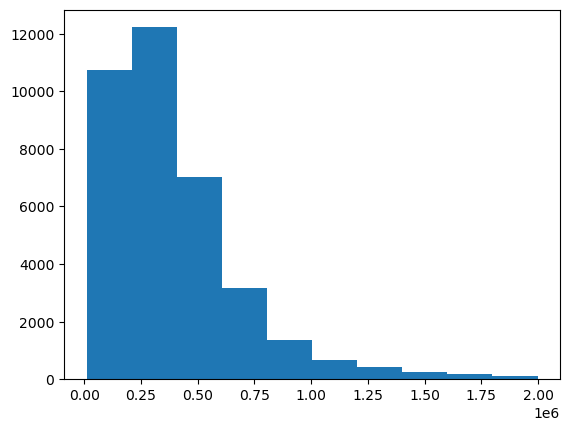

In [98]:
plt.hist(y_train)
plt.show()

In [99]:
tweedie = TweedieRegressor(power = 0)

tweedie.fit(X_train, y_train)

TweedieRegressor(power=0)

In [100]:
preds_df['tweedie'] = tweedie.predict(X_train)

preds_df

,actual,lm_preds,lasso_preds,tweedie
6939,687000.0,508416.0,507342.296523,443768.921661
6471,74121.0,278400.0,275997.437348,358445.552756
44553,143122.0,624128.0,622728.202207,362457.718215
31088,470066.0,461824.0,462648.096588,421125.046622
4038,107819.0,405888.0,410034.547619,383608.786773
...,...,...,...,...
23030,463419.0,373632.0,375514.322560,380835.111231
24932,178423.0,286720.0,284569.067443,357482.615568
31680,303959.0,326272.0,328985.216801,423194.050581
29484,488280.0,622976.0,623256.575199,445625.208050


In [101]:
tweedie_norm = sqrt(mean_squared_error(preds_df.actual, preds_df.tweedie))

tweedie_norm

289539.06846066413

In [102]:
tweedie_two = TweedieRegressor(power = 1)

tweedie_two.fit(X_train, y_train)

preds_df['tweedie_two'] = tweedie_two.predict(X_train)

In [103]:
tweedie_possion = sqrt(mean_squared_error(preds_df.actual, preds_df.tweedie_two))
tweedie_possion

238432.150629713

In [104]:
pf = PolynomialFeatures(degree = 2)

pf.fit(X_train, y_train)

PolynomialFeatures()

In [105]:
X_polynomial = pf.transform(X_train)

In [106]:
lm2 = LinearRegression()

lm2.fit(X_polynomial, y_train)

LinearRegression()

In [107]:
preds_df['poly_preds'] = lm2.predict(X_polynomial)

preds_df.head()

,actual,lm_preds,lasso_preds,tweedie,tweedie_two,poly_preds
6939,687000.0,508416.0,507342.296523,443768.921661,497901.783423,481712.0
6471,74121.0,278400.0,275997.437348,358445.552756,286119.101568,273968.0
44553,143122.0,624128.0,622728.202207,362457.718215,591886.409609,660528.0
31088,470066.0,461824.0,462648.096588,421125.046622,436694.552095,451888.0
4038,107819.0,405888.0,410034.547619,383608.786773,374691.831109,410000.0


In [108]:
poly_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['poly_preds']))

poly_rmse

228341.26647396767

In [109]:
lasso_two = LassoLars(alpha = 1)

lasso_two.fit(X_polynomial, y_train)

LassoLars(alpha=1)

In [110]:
preds_df['lasso_poly'] = lasso_two.predict(X_polynomial)

preds_df

,actual,lm_preds,lasso_preds,tweedie,tweedie_two,poly_preds,lasso_poly
6939,687000.0,508416.0,507342.296523,443768.921661,497901.783423,481712.0,503690.720426
6471,74121.0,278400.0,275997.437348,358445.552756,286119.101568,273968.0,281042.012562
44553,143122.0,624128.0,622728.202207,362457.718215,591886.409609,660528.0,591334.768491
31088,470066.0,461824.0,462648.096588,421125.046622,436694.552095,451888.0,471174.254000
4038,107819.0,405888.0,410034.547619,383608.786773,374691.831109,410000.0,407404.888101
...,...,...,...,...,...,...,...
23030,463419.0,373632.0,375514.322560,380835.111231,332385.949830,384944.0,386206.763874
24932,178423.0,286720.0,284569.067443,357482.615568,292694.814695,233648.0,294834.670404
31680,303959.0,326272.0,328985.216801,423194.050581,350960.982735,308144.0,346732.859142
29484,488280.0,622976.0,623256.575199,445625.208050,612784.741136,673328.0,668959.433201


In [111]:
lasso_poly_rmse = sqrt(mean_squared_error(preds_df.actual, preds_df.lasso_poly))

lasso_poly_rmse

235871.09141678258

In [112]:
compare_models = pd.DataFrame({'model': ['linear', 'lasso', 'tweedie_norm', ' tweedie_possion', 'linear_poly', 'lasso_poly'],
              'rmse': [lm_rmse, lasso_rmse, tweedie_norm, tweedie_possion, poly_rmse, lasso_poly_rmse]})

In [113]:
preds_df['baseline'] = y_train.mean()

preds_df.head()

,actual,lm_preds,lasso_preds,tweedie,tweedie_two,poly_preds,lasso_poly,baseline
6939,687000.0,508416.0,507342.296523,443768.921661,497901.783423,481712.0,503690.720426,387285.506975
6471,74121.0,278400.0,275997.437348,358445.552756,286119.101568,273968.0,281042.012562,387285.506975
44553,143122.0,624128.0,622728.202207,362457.718215,591886.409609,660528.0,591334.768491,387285.506975
31088,470066.0,461824.0,462648.096588,421125.046622,436694.552095,451888.0,471174.254000,387285.506975
4038,107819.0,405888.0,410034.547619,383608.786773,374691.831109,410000.0,407404.888101,387285.506975


In [165]:
def baseline(y_train):
    
    preds_df = pd.DataFrame({'actual': y_train})
    
    preds_df['baseline'] = y_train.mean()
    
    baseline_rmse = sqrt(mean_squared_error(preds_df.actual, preds_df.baseline))

    return baseline_rmse

In [166]:
baseline(y_train)

299641.38583791535

In [115]:
compare_models

,model,rmse
0,linear,234722.477000
1,lasso,234681.585603
2,tweedie_norm,289539.068461
3,tweedie_possion,238432.150630
4,linear_poly,228341.266474
5,lasso_poly,235871.091417


In [116]:
compare_models.loc[len(compare_models.index)] = ['baseline', baseline_rmse] 

In [117]:
pd.options.display.float_format = '{:.2f}'.format
compare_models.sort_values('rmse')

,model,rmse
4,linear_poly,228341.27
1,lasso,234681.59
0,linear,234722.48
5,lasso_poly,235871.09
3,tweedie_possion,238432.15
2,tweedie_norm,289539.07
6,baseline,299641.39


In [138]:
def lasso_lars(X_train, y_train):
    
    metrics = []

    for i in np.arange(0.05, 1, .05):
    
        lasso = LassoLars(alpha = i )
    
        lasso.fit(X_train, y_train)
    
        lasso_preds = lasso.predict(X_train)
    
        preds_df = pd.DataFrame({'actual': y_train})
    
        preds_df['lasso_preds'] = lasso_preds

        lasso_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['lasso_preds']))
    
        output = {
                'alpha': i,
                'lasso_rmse': lasso_rmse
                 }
    
        metrics.append(output)

    df = pd.DataFrame(metrics)    
    return df.sort_values('lasso_rmse')

In [174]:
lasso_lars(X_train, y_train)

234681.58560335016

In [122]:
metrics = []

for i in np.arange(0.05, 1, .05):
    
    lasso = LassoLars(alpha = i )
    
    lasso.fit(X_train, y_train)
    
    lasso_preds = lasso.predict(X_train)
    
    preds_df['lasso_preds'] = lasso_preds

    lasso_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['lasso_preds']))
    
    output = {
            'alpha': i,
            'lasso_rmse': lasso_rmse
             }
    
    metrics.append(output)

df = pd.DataFrame(metrics)    
df.sort_values('lasso_rmse')

,alpha,lasso_rmse
0,0.05,234681.59
1,0.10,234681.62
2,0.15,234681.67
3,0.20,234681.74
4,0.25,234681.83
5,0.30,234681.94
6,0.35,234682.08
7,0.40,234682.23
8,0.45,234682.41
9,0.50,234682.60


In [136]:
def tweedie_models(X_train, y_train):
    metrics = []

    for i in range(0, 4, 1):
    
        tweedie = TweedieRegressor(power = i)
    
        tweedie.fit(X_train, y_train)
    
        tweedie_preds = tweedie.predict(X_train)
    
        preds_df['tweedie_preds'] = tweedie_preds
    
        tweedie_rmse = sqrt(mean_squared_error(preds_df.actual, preds_df.tweedie_preds))
    
        output = {
                'power': i,
                'tweedie_rmse': tweedie_rmse
                 }
    
        metrics.append(output)

    df = pd.DataFrame(metrics)    
    return df.sort_values('tweedie_rmse')    

In [137]:
tweedie_models(X_train, y_train)

,power,tweedie_rmse
1,1,238432.15
0,0,289539.07
2,2,289765.22
3,3,299641.39


In [125]:
metrics = []

for i in range(0, 4, 1):
    
    tweedie = TweedieRegressor(power = i)
    
    tweedie.fit(X_train, y_train)
    
    tweedie_preds = tweedie.predict(X_train)
    
    preds_df['tweedie_preds'] = tweedie_preds
    
    tweedie_rmse = sqrt(mean_squared_error(preds_df.actual, preds_df.tweedie_preds))
    
    output = {
            'power': i,
            'tweedie_rmse': tweedie_rmse
             }
    
    metrics.append(output)

df = pd.DataFrame(metrics)    
df.sort_values('tweedie_rmse')    

,power,tweedie_rmse
1,1,238432.15
0,0,289539.07
2,2,289765.22
3,3,299641.39


In [126]:
def lasso_poly(X_train, y_train):
    
    
    metrics = []

    for i in np.arange(0.05, 1, .05):
    
        lasso_two = LassoLars(alpha = i)
        
        X_polynomial = pf.transform(X_train)

        lasso_two.fit(X_polynomial, y_train)

        preds_df['lasso_poly'] = lasso_two.predict(X_polynomial)

        lasso_poly_rmse = sqrt(mean_squared_error(preds_df.actual, preds_df.lasso_poly))

        output = {
                'alpha': i,
                'lasso_poly_rmse': lasso_poly_rmse
                 }

        metrics.append(output)

    df = pd.DataFrame(metrics)    
    return df.sort_values('lasso_poly_rmse')   

In [ ]:
lasso_poly(X_train, y_train)

In [128]:
metrics = []

for i in np.arange(0.05, 1, .05):
    
    lasso_two = LassoLars(alpha = i)

    lasso_two.fit(X_polynomial, y_train)

    preds_df['lasso_poly'] = lasso_two.predict(X_polynomial)

    lasso_poly_rmse = sqrt(mean_squared_error(preds_df.actual, preds_df.lasso_poly))

    output = {
            'alpha': i,
            'lasso_poly_rmse': lasso_poly_rmse
             }
    
    metrics.append(output)

df = pd.DataFrame(metrics)    
df.sort_values('lasso_poly_rmse')   

,alpha,lasso_poly_rmse
0,0.05,235871.09
16,0.85,235871.09
15,0.80,235871.09
14,0.75,235871.09
13,0.70,235871.09
12,0.65,235871.09
11,0.60,235871.09
10,0.55,235871.09
17,0.90,235871.09
9,0.50,235871.09


In [175]:
def linear_poly(X_train, y_train):
    metrics = []

    for i in range(2,4):

        pf = PolynomialFeatures(degree = i)

        pf.fit(X_train, y_train)

        X_polynomial = pf.transform(X_train)

        lm2 = LinearRegression()

        lm2.fit(X_polynomial, y_train)
        
        preds_df = pd.DataFrame({'actual': y_train})

        preds_df['poly_preds'] = lm2.predict(X_polynomial)

        poly_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['poly_preds']))

        output = {
                'degree': i,
                'poly_rmse': poly_rmse
                 }

        metrics.append(output)

    df = pd.DataFrame(metrics)    
    return df.sort_values('poly_rmse')   

In [176]:
linear_poly(X_train, y_train).iloc[0,1]

217147.98396928096

In [131]:
metrics = []

for i in range(2,4):
    
    pf = PolynomialFeatures(degree = i)
    
    pf.fit(X_train, y_train)

    X_polynomial = pf.transform(X_train)

    lm2 = LinearRegression()

    lm2.fit(X_polynomial, y_train)

    preds_df['poly_preds'] = lm2.predict(X_polynomial)

    poly_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['poly_preds']))

    output = {
            'degree': i,
            'poly_rmse': poly_rmse
             }
    
    metrics.append(output)

df = pd.DataFrame(metrics)    
df.sort_values('poly_rmse')   

,degree,poly_rmse
1,3,217147.98
0,2,228341.27


In [89]:
best_models = pd.DataFrame({'model': ['linear', 'lasso', ' tweedie_possion', 'linear_poly', 'lasso_poly','baseline'],
              'rmse': [lm_rmse, lasso_rmse, tweedie_possion, poly_rmse, lasso_poly_rmse, baseline_rmse]})

In [90]:
best_train_models = best_models.sort_values('rmse').reset_index().drop(columns = ['index'])

best_train_models

,model,rmse
0,linear_poly,217147.98
1,lasso,234685.28
2,linear,234722.48
3,lasso_poly,235871.09
4,tweedie_possion,238432.15
5,baseline,299641.39


In [93]:
preds_df['actual_val'] = y_validate
preds_df['actual_test'] = y_test

In [123]:
pf = PolynomialFeatures(degree = 3)
    
pf.fit(X_train, y_train)
X_train_d3 = pf.transform(X_train)

X_validate_d3 = pf.transform(X_validate)
X_test_d3 = pf.transform(X_test)

lm2 = LinearRegression()
lm2.fit(X_train_d3, y_train)

preds_df['poly_preds'] = lm2.predict(X_train_d3)
train_rmse = sqrt(mean_squared_error(preds_df.actual,preds_df['poly_preds']))

In [137]:
val_preds_df = pd.DataFrame({'actual_val': y_validate
                            })
val_preds_df

,actual_val
1796,143025.00
20842,61044.00
40515,192800.00
11411,661943.00
46198,533006.00
...,...
51503,236754.00
32118,1155810.00
1577,361663.00
40307,167966.00


In [138]:
val_preds_df['poly_vals'] = lm2.predict(X_validate_d3)

val_preds_df

,actual_val,poly_vals
1796,143025.00,24608.00
20842,61044.00,308256.00
40515,192800.00,256288.00
11411,661943.00,474368.00
46198,533006.00,279232.00
...,...,...
51503,236754.00,335712.00
32118,1155810.00,1350560.00
1577,361663.00,409760.00
40307,167966.00,645056.00


In [144]:
test_preds_df = pd.DataFrame({'actual_test': y_test
                            })
test_preds_df

,actual_test
1099,426408.00
30910,288212.00
49676,331446.00
3106,32050.00
23571,323642.00
...,...
39979,384047.00
11320,674416.00
6590,872325.00
7019,266548.00


In [145]:
test_preds_df['poly_test'] = lm2.predict(X_test_d3)
test_preds_df.head()

,actual_test,poly_test
1099,426408.00,337152.00
30910,288212.00,409600.00
49676,331446.00,254368.00
3106,32050.00,186112.00
23571,323642.00,272032.00


In [174]:
poly_validate_rmse = sqrt(mean_squared_error(val_preds_df.actual_val, val_preds_df['poly_vals']))

poly_test_rmse = sqrt(mean_squared_error(test_preds_df.actual_test, test_preds_df['poly_test']))
validate_rmse, test_rmse

(215540.63383958949, 218743.5234421221)

In [96]:
preds_df.head()

,actual,lm_preds,lasso_preds,tweedie,tweedie_two,poly_preds,lasso_poly,baseline,tweedie_preds,actual_val,actual_test
6939,687000.00,508416.00,507486.20,443768.92,497901.78,401568.00,503690.72,387285.51,387285.51,NaN,687000.00
6471,74121.00,278400.00,276011.50,358445.55,286119.10,261664.00,281042.01,387285.51,387285.51,NaN,74121.00
44553,143122.00,624128.00,622522.02,362457.72,591886.41,640672.00,591334.77,387285.51,387285.51,NaN,143122.00
31088,470066.00,461824.00,463748.38,421125.05,436694.55,462272.00,471174.25,387285.51,387285.51,470066.00,NaN
4038,107819.00,405888.00,410548.61,383608.79,374691.83,372512.00,407404.89,387285.51,387285.51,NaN,107819.00


In [147]:
rmse_df = pd.DataFrame({'data': ['train','validate','test'],
                        'rmse': [train_rmse, validate_rmse, test_rmse]
                       })
rmse_df

,data,rmse
0,train,217147.98
1,validate,215540.63
2,test,218743.52


In [194]:
def validate_models(X_train, y_train, X_validate, y_validate):
   
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    
    lm_val = lm.predict(X_validate)
    
    val_preds_df = pd.DataFrame({'actual_val': y_validate})
    
    val_preds_df['lm_preds'] = lm_val

    lm_rmse_val = sqrt(mean_squared_error(val_preds_df['actual_val'], val_preds_df['lm_preds']))

    #lassolars model
    lasso = LassoLars(alpha = 0.05)

    lasso.fit(X_train, y_train)

    lasso_val = lasso.predict(X_validate)

    val_preds_df['lasso_preds'] = lasso_val

    lasso_rmse_val = sqrt(mean_squared_error(val_preds_df['actual_val'],val_preds_df['lasso_preds']))
    
    #polynomial model
    
    pf = PolynomialFeatures(degree = 3)
    
    pf.fit(X_train, y_train)
    
    X_train = pf.transform(X_train)
    X_validate = pf.transform(X_validate)
    
    lm2 = LinearRegression()
    
    lm2.fit(X_train, y_train)
    
    val_preds_df['poly_vals'] = lm2.predict(X_validate)
    
    poly_validate_rmse = sqrt(mean_squared_error(val_preds_df.actual_val, val_preds_df['poly_vals']))

    return lm_rmse_val, lasso_rmse_val, poly_validate_rmse

In [195]:
validate_models(X_train, y_train, X_validate, y_validate)

(232936.5027350161, 232887.89326538687, 215540.63383958949)

In [200]:
def test_model(X_train, y_train, X_test, y_test):
    
    pf = PolynomialFeatures(degree = 3)

    pf.fit(X_train, y_train)
    X_train = pf.transform(X_train)

    X_test = pf.transform(X_test)

    lm = LinearRegression()
    lm.fit(X_train, y_train)

    test_preds_df = pd.DataFrame({'actual_test': y_test})

    test_preds_df['poly_test'] = lm.predict(X_test)

    poly_test_rmse = sqrt(mean_squared_error(test_preds_df.actual_test, test_preds_df['poly_test']))
    
    return poly_test_rmse

In [201]:
test_model(X_train, y_train, X_test, y_test)

218743.5234421221

In [150]:
lasso = LassoLars(alpha = 0.05)
    
lasso.fit(X_train, y_train)
    
lasso_val = lasso.predict(X_validate)
    
val_preds_df['lasso_preds'] = lasso_val

lasso_rmse_val = sqrt(mean_squared_error(val_preds_df['actual_val'],val_preds_df['lasso_preds']))
    

In [151]:
val_preds_df

,actual_val,poly_vals,lasso_preds
1796,143025.00,24608.00,83785.44
20842,61044.00,308256.00,256111.54
40515,192800.00,256288.00,238379.47
11411,661943.00,474368.00,401998.87
46198,533006.00,279232.00,256784.83
...,...,...,...
51503,236754.00,335712.00,388300.24
32118,1155810.00,1350560.00,1094847.67
1577,361663.00,409760.00,487154.92
40307,167966.00,645056.00,638179.93


In [172]:
lm_val = lm.predict(X_validate)

val_preds_df['lm_preds'] = lm_val

lm_rmse_val = sqrt(mean_squared_error(val_preds_df['actual_val'], val_preds_df['lm_preds']))

In [173]:
lasso_rmse, lasso_rmse_val, lm_rmse_val

(234685.27946595984, 232887.89326538687, 232936.5027350161)

In [167]:
train_val_model_compare = best_train_models.loc[:2]

In [168]:
train_val_model_compare = train_val_model_compare.rename(columns = {'rmse': 'train_rmse'})

train_val_model_compare.head()

,model,train_rmse
0,linear_poly,217147.98
1,lasso,234685.28
2,linear,234722.48


In [175]:
train_val_model_compare['val_rmse'] = [poly_validate_rmse,lasso_rmse_val,lm_rmse_val]

train_val_model_compare

,model,train_rmse,val_rmse
0,linear_poly,217147.98,215540.63
1,lasso,234685.28,232887.89
2,linear,234722.48,232936.50


In [202]:
def best_models(X_train, y_train, X_validate, y_validate):
    
    lm_rmse = linear_model(X_train, y_train).iloc[0,1]
    
    lasso_rmse = lasso_lars(X_train, y_train).iloc[0,1]
        
    poly_rmse = linear_poly(X_train, y_train).iloc[0,1]
    
    baseline_rmse = baseline(y_train)
    
    lm_rmse_val, lasso_rmse_val, poly_validate_rmse = validate_models(X_train, y_train, X_validate, y_validate)
    
    df = pd.DataFrame({'model': ['linear', 'lasso', 'linear_poly', 'baseline'],
                      'train_rmse': [lm_rmse, lasso_rmse, poly_rmse, baseline_rmse],
                      'validate_rmse': [lm_rmse_val, lasso_rmse_val, poly_validate_rmse, baseline_rmse]})
    
    df['difference'] = df['train_rmse'] - df['validate_rmse']
    
    return df.sort_values('train_rmse').reset_index().drop(columns = ('index'))

In [203]:
best_models(X_train, y_train, X_validate, y_validate)

,model,train_rmse,validate_rmse,difference
0,linear_poly,217147.98,215540.63,1607.35
1,lasso,234681.59,232887.89,1793.69
2,linear,234722.48,232936.50,1785.97
3,baseline,299641.39,299641.39,0.00


In [206]:
def best_model(X_train, y_train, X_validate, y_validate, X_test, y_test):
    
    df = best_models(X_train, y_train, X_validate, y_validate).head(1)
    
    df['test_rmse'] = test_model(X_train, y_train, X_test, y_test)
    
    df = df.drop(columns = ['difference'])

    return df

In [207]:
best_model(X_train, y_train, X_validate, y_validate, X_test, y_test)

,model,train_rmse,validate_rmse,test_rmse
0,linear_poly,217147.98,215540.63,218743.52


In [209]:
299641.39 - 217147.98

82493.41

In [210]:
299641.39 - 215540.63

84100.76000000001

In [211]:
299641.39 - 218743.52

80897.87000000002

In [212]:
217147.98/299641.39

0.7246928737047976

In [213]:
(299641.39 - 217147.98)/299641.39

0.27530712629520243